# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks. 

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.


In [33]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt



**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [34]:

def mvn(x, d, mean, covariance):
    x_m = x - mean
    return (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) *
            np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m)) / 2))

def Bayes1a(X_train, Y_train, X_test):
    n = X_train.shape[0]
    d = X_train.shape[1]
    u1 = np.zeros(d);
    u2 = np.zeros(d);
    n1 = 0;
    n2 = 0;

    for i in range(n):
        if Y_train[i] == 1:
            u1 = u1 + X_train[i]
            n1 = n1 + 1
        else:
            u2 = u2 + X_train[i]
            n2 = n2 + 1

    u1 = u1/n1
    u2 = u2/n2
    a = float(n1)/n

    cov = np.identity(d)
    Y_test_pred = np.zeros(n)

    for i in range(n):
        res = a*(mvn(X_train[i],d,u1,cov))
        res = res / (a*(mvn(X_train[i],d,u1,cov)) + (1-a)*mvn(X_train[i],d,u2,cov))
        Y_test_pred[i] = np.sign(2*res -1)

    return Y_test_pred

def mult_np(X,n):
    A = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            A[i][j] = X[i]*X[j]
    return A

def Bayes1b(X_train, Y_train, X_test):
    n = X_train.shape[0]
    d = X_train.shape[1]
    u1 = np.zeros(d);
    u2 = np.zeros(d);
    n1 = 0;
    n2 = 0;

    for i in range(n):
        if Y_train[i] == 1:
            u1 = u1 + X_train[i]
            n1 = n1 + 1
        else:
            u2 = u2 + X_train[i]
            n2 = n2 + 1

    u1 = u1/n1
    u2 = u2/n2
    a = float(n1)/n

    cov = np.zeros((d,d))
    for i in range(n):
        if Y_train[i] == 1:
            cov = cov + mult_np(X_train[i] - u1,d)
        else:
            cov = cov + mult_np(X_train[i] - u2,d)

    cov = cov/n

    Y_test_pred = np.zeros(n)

    for i in range(n):
        res = a*(mvn(X_train[i],d,u1,cov))
        res = res / (a*(mvn(X_train[i],d,u1,cov)) + (1-a)*mvn(X_train[i],d,u2,cov))
        Y_test_pred[i] = np.sign(2*res -1)

    return Y_test_pred

def Bayes1c(X_train, Y_train, X_test):

    n = X_train.shape[0]
    d = X_train.shape[1]
    u1 = np.zeros(d);
    u2 = np.zeros(d);
    n1 = 0;
    n2 = 0;

    for i in range(n):
        if Y_train[i] == 1:
            u1 = u1 + X_train[i]
            n1 = n1 + 1
        else:
            u2 = u2 + X_train[i]
            n2 = n2 + 1

    u1 = u1/n1
    u2 = u2/n2
    a = float(n1)/n

    cov1 = np.zeros((d,d))
    cov2 = np.zeros((d,d))

    for i in range(n):
        if Y_train[i] == 1:
            cov1 = cov1 + mult_np(X_train[i] - u1,d)
        else:
            cov2 = cov2 + mult_np(X_train[i] - u2,d)

    cov1 = cov1/n
    cov2 = cov2/n
    Y_test_pred = np.zeros(n)

    for i in range(n):
        res = a*(mvn(X_train[i],d,u1,cov1))
        res = res / (a*(mvn(X_train[i],d,u1,cov1)) + (1-a)*mvn(X_train[i],d,u2,cov2))
        Y_test_pred[i] = np.sign(2*res -1)

    return Y_test_pred


In [35]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)

print(Y_pred_test_1a)
print(Y_pred_test_1b)
print(Y_pred_test_1c)


[-1.  1.  1. ... -1.  1. -1.]
[-1.  1.  1. ... -1.  1. -1.]
[-1.  1.  1. ... -1.  1. -1.]


**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately. 

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets as 3x3 table, with appropriately named rows and columns.


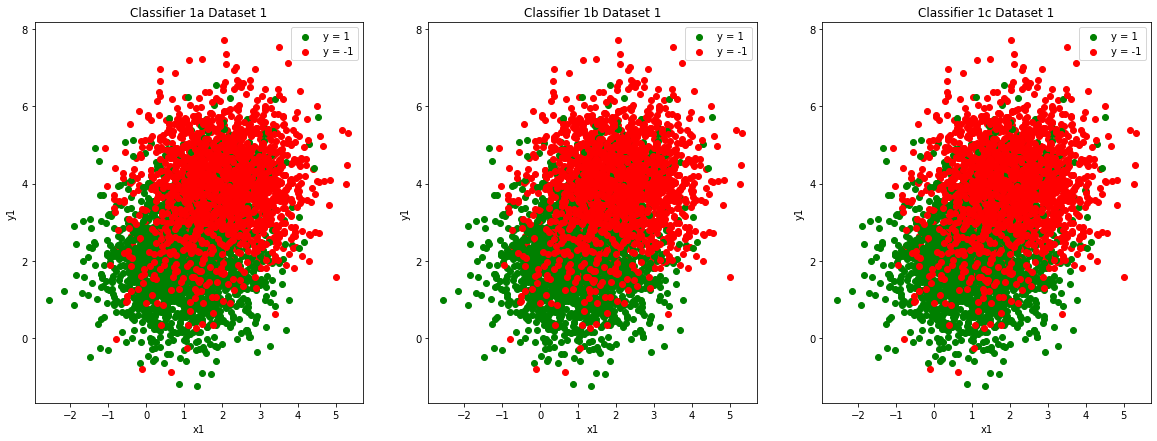

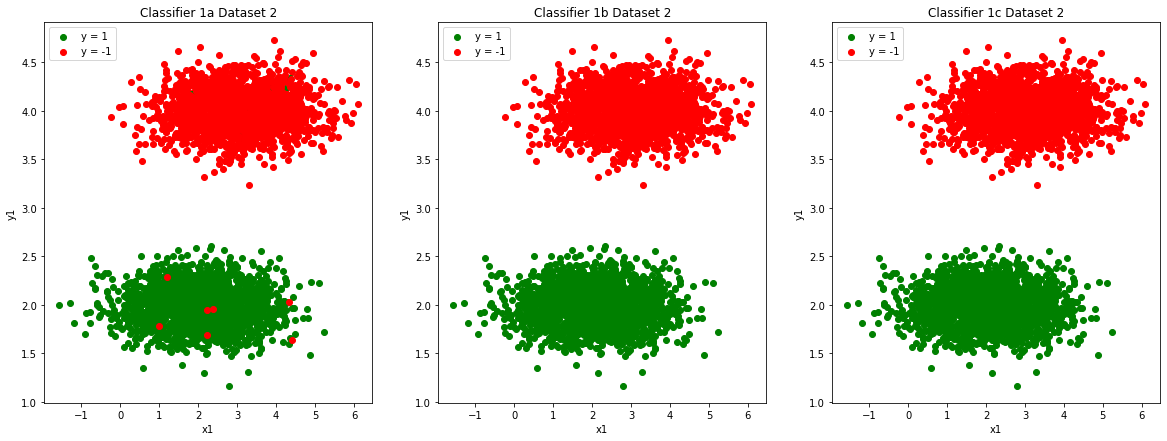

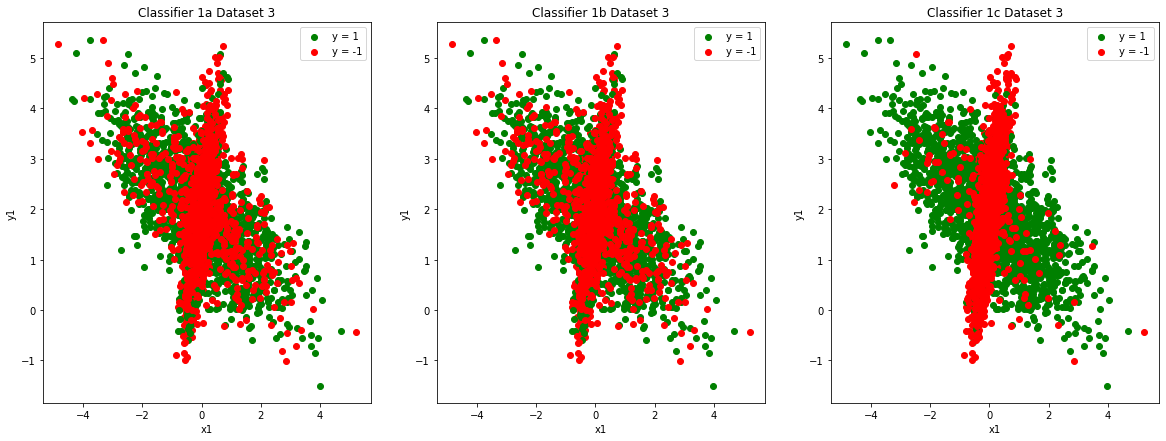

In [107]:
data1 = np.load('dataset1_1.npz')
data2 = np.load('dataset1_2.npz')
data3 = np.load('dataset1_3.npz')


X_train = np.array([data1['arr_0'],data2['arr_0'],data3['arr_0']])
Y_train = np.array([data1['arr_1'],data2['arr_1'],data3['arr_1']])
X_test = np.array([data1['arr_2'],data2['arr_2'],data3['arr_2']])
Y_test = np.array([data1['arr_3'],data2['arr_3'],data3['arr_3']])

Y_pred = np.array([
[Bayes1a(X_train[0],Y_train[0], X_test[0]),Bayes1b(X_train[0],Y_train[0], X_test[0]),Bayes1c(X_train[0],Y_train[0], X_test[0])],
[Bayes1a(X_train[1],Y_train[1], X_test[1]),Bayes1b(X_train[1],Y_train[1], X_test[1]),Bayes1c(X_train[1],Y_train[1], X_test[1])],
[Bayes1a(X_train[2],Y_train[2], X_test[2]),Bayes1b(X_train[2],Y_train[2], X_test[2]),Bayes1c(X_train[2],Y_train[2], X_test[2])]
])

err = np.zeros((3,3))

for l in range(3):
    fig,a =  plt.subplots(1,3,figsize=(20,7))
    for k in range(3):
        points1 = X_train[l][Y_train[l] == 1]
        points2 = X_train[l][Y_train[l] == -1]
        points3 = X_test[l][Y_pred[l][k] == 1]
        points4 = X_test[l][Y_pred[l][k] == -1]
        a[k].scatter(points1[:, 0], points1[:, 1], label = "y = 1", color = 'g')
        a[k].scatter(points2[:,0], points2[:, 1], label = "y = -1", color = 'r')
        a[k].scatter(points3[:, 0], points3[:, 1], color = 'g')
        a[k].scatter(points4[:,0], points4[:, 1],color = 'r')
        s = "Classifier 1" 
        if(k == 0):
            s += "a"
        elif(k == 1):
            s += "b"
        else:
            s += "c"
        s += ' Dataset ' + str(l+1)
        a[k].set_title(s)
        a[k].set(xlabel = "x1",ylabel = "y1")
        a[k].legend()
    
    plt.show()
    

for l in range(3):
    for k in range(3):
        for i in range(X_test[l].shape[0]) :
            err[l][k] += abs(Y_pred[l][k][i] - Y_test[l][i])/2
        err[l][k] /= X_test[l].shape[0]
        
# print(err)

** Cell type : TextWrite ** 
(Write your observations and table of errors here)

                                                ERROR TABLE

|           | Classifier 1a | Classifier 1b | Classifier 1c |
|-----------|---------------|---------------|---------------|
| Dataset 1 | 0.1315        | 0.131         | 0.1315        |
| Dataset 2 | 0.008         | 0.0           | 0.0           |
| Dataset 3 | 0.489         | 0.49          | 0.1305        |

Observations:

->The error when we estimate different Variance matrices(Classifier 1c) is least among the other classifiers 

->The error for Classifiers 1a and 1b are almost the same



** Cell type : TextRead ** 


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$ 

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [92]:

def mvn(x, d, mean, covariance):
    x_m = x - mean
    return (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) *
            np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m)) / 2))

def Bayes2a(X_train, Y_train, X_test):
    n = X_train.shape[0]
    d = X_train.shape[1]

    u = np.zeros((5,d))
    N = np.zeros(5)


    for i in range(n):
        k =Y_train[i]
        if(k == 1):
            u[1] += X_train[i]
            N[1] += 1
        elif(k == 2):
            u[2] += X_train[i]
            N[2] += 1
        elif(k == 3):
            u[3] += X_train[i]
            N[3] += 1
        else:
            u[4] += X_train[i]
            N[4] += 1

    a = np.zeros(5)
    for i in range(1,5):
        u[i] /= N[i]
        a[i] = float(N[i])/n


    cov = np.identity(d)
    p = np.zeros(5)
    Y_test_pred = np.zeros(n)
    l = np.zeros(5)

    for i in range(n):
        den = 0
        for j in range(2,5):
            p[j] = a[j]*(mvn(X_train[i],d,u[j],cov))
            den += p[j]
        for j in range(2,5):
            p[j] /= den


        l[0] = 100000
        l[1] = p[2]+2*p[3]+3*p[4]
        l[2] = p[1]+p[3]+2*p[4]
        l[3] = 2*p[1]+p[2]+p[4]
        l[4] = 3*p[1]+2*p[2]+p[3]

        res = np.where(l == np.amin(l))
        Y_test_pred[i] = res[0]

    return Y_test_pred

def mult_np(X,n):
    A = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            A[i][j] = X[i]*X[j]
    return A

def Bayes2b(X_train, Y_train, X_test):
    n = X_train.shape[0]
    d = X_train.shape[1]

    u = np.zeros((5,d))
    N = np.zeros(5)

    for i in range(n):
        k =Y_train[i]
        if(k == 1):
            u[1] += X_train[i]
            N[1] += 1
        elif(k == 2):
            u[2] += X_train[i]
            N[2] += 1
        elif(k == 3):
            u[3] += X_train[i]
            N[3] += 1
        else:
            u[4] += X_train[i]
            N[4] += 1

    a = np.zeros(5)
    for i in range(1,5):
        u[i] /= N[i]
        a[i] = float(N[i])/n


    cov = np.zeros((d,d))

    for i in range(n):
        if Y_train[i] == 1:
            cov = cov + mult_np(X_train[i] - u[1],d)
        elif Y_train[i] == 2:
            cov = cov + mult_np(X_train[i] - u[2],d)
        elif Y_train[i] == 3:
            cov = cov + mult_np(X_train[i] - u[3],d)
        elif Y_train[i] == 4:
            cov = cov + mult_np(X_train[i] - u[4],d)

    cov /= n

    p = np.zeros(5)
    Y_test_pred = np.zeros(n)
    l = np.zeros(5)

    for i in range(n):
        den = 0
        for j in range(2,5):
            p[j] = a[j]*(mvn(X_train[i],d,u[j],cov))
            den += p[j]
        for j in range(2,5):
            p[j] /= den


        l[0] = 100000
        l[1] = p[2]+2*p[3]+3*p[4]
        l[2] = p[1]+p[3]+2*p[4]
        l[3] = 2*p[1]+p[2]+p[4]
        l[4] = 3*p[1]+2*p[2]+p[3]
        # print(l)
        res = np.where(l == np.amin(l))
        Y_test_pred[i] = res[0]

    return Y_test_pred

def Bayes2c(X_train, Y_train, X_test):
    n = X_train.shape[0]
    d = X_train.shape[1]

    u = np.zeros((5,d))
    N = np.zeros(5)

    for i in range(n):
        k =Y_train[i]
        if(k == 1):
            u[1] += X_train[i]
            N[1] += 1
        elif(k == 2):
            u[2] += X_train[i]
            N[2] += 1
        elif(k == 3):
            u[3] += X_train[i]
            N[3] += 1
        else:
            u[4] += X_train[i]
            N[4] += 1

    a = np.zeros(5)
    for i in range(1,5):
        u[i] /= N[i]
        a[i] = float(N[i])/n

    cov1 = np.zeros((d,d))
    cov2 = np.zeros((d,d))
    cov3 = np.zeros((d,d))
    cov4 = np.zeros((d,d))

    for i in range(n):
        if Y_train[i] == 1:
            cov1 = cov1 + mult_np(X_train[i] - u[1],d)
        elif Y_train[i] == 2:
            cov2 = cov2 + mult_np(X_train[i] - u[2],d)
        elif Y_train[i] == 3:
            cov3 = cov3 + mult_np(X_train[i] - u[3],d)
        elif Y_train[i] == 4:
            cov4 = cov4 + mult_np(X_train[i] - u[4],d)

    cov1 = cov1/N[1]
    cov2 = cov2/N[2]
    cov3 = cov3/N[3]
    cov4 = cov4/N[4]
    cov0 = np.zeros((d,d))

    cov = np.array([cov0,cov1,cov2,cov3,cov4])

    p = np.zeros(5)
    Y_test_pred = np.zeros(n)
    l = np.zeros(5)

    for i in range(n):
        den = 0
        for j in range(2,5):
            p[j] = a[j]*(mvn(X_train[i],d,u[j],cov[j]))
            den += p[j]
        for j in range(2,5):
            p[j] /= den


        l[0] = 100000
        l[1] = p[2]+2*p[3]+3*p[4]
        l[2] = p[1]+p[3]+2*p[4]
        l[3] = 2*p[1]+p[2]+p[4]
        l[4] = 3*p[1]+2*p[2]+p[3]
#         print(l)
        res = np.where(l == np.amin(l))
        Y_test_pred[i] = res[0]
#         print(Y_test_pred[i])

    return Y_test_pred


In [93]:
# Cell type : Convenience

# Testing the functions above

# Data 1

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))



Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)

print(Y_pred_test_2a)
print(Y_pred_test_2b)
print(Y_pred_test_2c)



[2. 3. 2. ... 4. 4. 4.]
[2. 3. 2. ... 4. 4. 4.]
[2. 3. 2. ... 4. 4. 4.]


**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately. 

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets. 


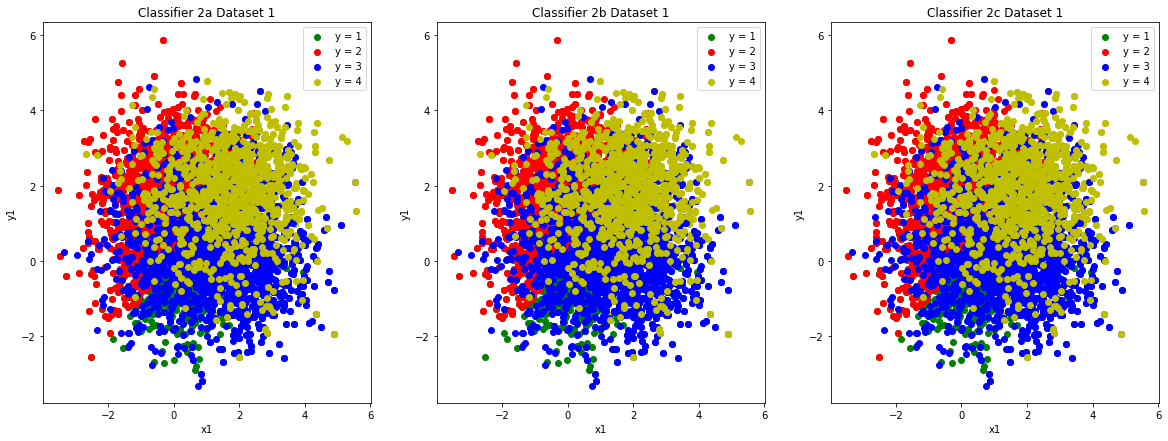

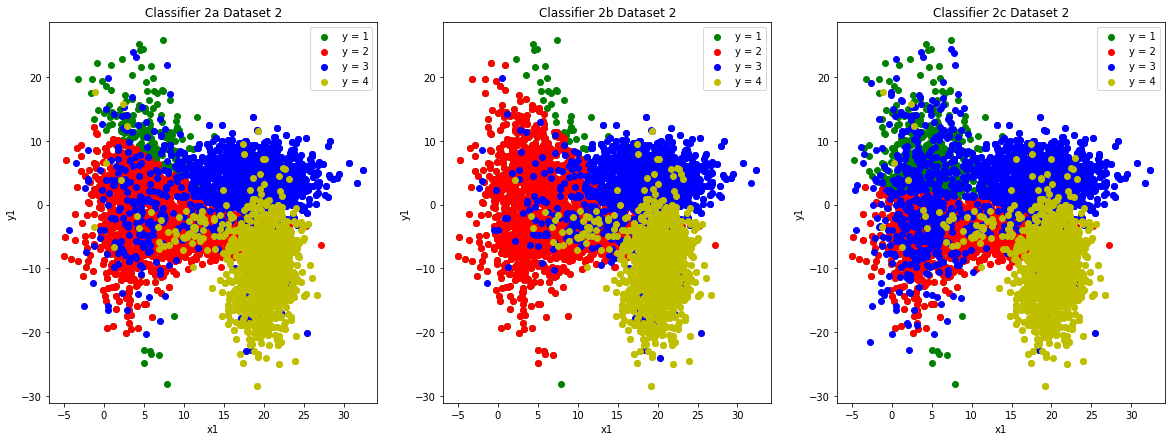

In [108]:

data1 = np.load('dataset2_1.npz')
data2 = np.load('dataset2_2.npz')

loss = np.array([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]])

X_train = np.array([data1['arr_0'],data2['arr_0']])
Y_train = np.array([data1['arr_1'],data2['arr_1']])
X_test = np.array([data1['arr_2'],data2['arr_2']])
Y_test = np.array([data1['arr_3'],data2['arr_3']])

Y_pred = np.array([
[Bayes2a(X_train[0],Y_train[0], X_test[0]),Bayes2b(X_train[0],Y_train[0], X_test[0]),Bayes2c(X_train[0],Y_train[0], X_test[0])],
[Bayes2a(X_train[1],Y_train[1], X_test[1]),Bayes2b(X_train[1],Y_train[1], X_test[1]),Bayes2c(X_train[1],Y_train[1], X_test[1])]
])


err = np.zeros((2,3))

def confusion_matrix(pred, actual) :
#     print("ji")
    conf_matrix = np.zeros((4,4))
    for i in range(pred.shape[0]):
        conf_matrix[int(actual[i])-1][int(pred[i])-1] += 1
    return conf_matrix


    

for l in range(2):
    fig,a =  plt.subplots(1,3,figsize=(20,7))
    for k in range(3):
        c_m = confusion_matrix(Y_pred[l][k], Y_test[l])
        points11 = X_train[l][Y_train[l] == 1]
        points12 = X_train[l][Y_train[l] == 2]
        points13 = X_test[l][Y_train[l] == 3]
        points14 = X_test[l][Y_train[l]  == 4]
        
        points21 = X_train[l][Y_pred[l][k] == 1]
        points22 = X_train[l][Y_pred[l][k] == 2]
        points23 = X_test[l][Y_pred[l][k] == 3]
        points24 = X_test[l][Y_pred[l][k] == 4]
        
        a[k].scatter(points11[:, 0], points11[:, 1], label = "y = 1", color = 'g')
        a[k].scatter(points12[:,0], points12[:, 1], label = "y = 2", color = 'r')
        a[k].scatter(points13[:, 0], points13[:, 1], label = "y = 3", color = 'b')
        a[k].scatter(points14[:,0], points14[:, 1], label = "y = 4", color = 'y')
        
        a[k].scatter(points21[:, 0], points21[:, 1], color = 'g')
        a[k].scatter(points22[:,0], points22[:, 1],  color = 'r')
        a[k].scatter(points23[:, 0], points23[:, 1], color = 'b')
        a[k].scatter(points24[:,0], points24[:, 1], color = 'y')
        
        s = "Classifier 2" 
        if(k == 0):
            s += "a"
        elif(k == 1):
            s += "b"
        else:
            s += "c"
        s += ' Dataset ' + str(l+1)
        a[k].set_title(s)
        a[k].set(xlabel = "x1",ylabel = "y1")
        a[k].legend()
        
#         for i in range(0, 4) :
#             print("| True Class = ",i+1," | ",c_m[i][0],"                 | ",c_m[i][1],"                 | ",c_m[i][2],"                 | ",c_m[i][3],"                 | ")
                
    plt.show()

for l in range(2):
    for k in range(3):
        err[l][k] += loss[int(Y_test[l][i]-1)][int(Y_pred[l][k][i]-1)]
    err[l][k] /= X_test[l].shape[0]



# print(err)


** Cell type : TextWrite ** 


                                                ERROR TABLE
|           | Classifier 2a | Classifier 2b | Classifier 2c |
|-----------|---------------|---------------|---------------|
| Dataset 1 | 0.6165      | 0.6185        | 0.62       |
| Dataset 2 | 0.39575      | 0.37975        | 0.4575       |



                       CONFUSION MATRIX FOR CLASSIFIER 2a, DATASET 1
                                
|                | Predicted Class = 1 | Predicted Class = 2 | Predicted Class = 3 | Predicted Class = 4 |
|----------------|---------------------|---------------------|---------------------|---------------------|
| True Class =  1  |  0.0                  |  478.0                  |  508.0                  |  14.0                  | 
| True Class =  2  |  0.0                  |  767.0                  |  108.0                  |  125.0                  | 
| True Class =  3  |  0.0                  |  31.0                  |  867.0                  |  102.0                  | 
| True Class =  4  |  0.0                  |  123.0                  |  193.0                  |  684.0                  | 

                                    CONFUSION MATRIX FOR CLASSIFIER 2b, DATASET 1
                                
|                | Predicted Class = 1 | Predicted Class = 2 | Predicted Class = 3 | Predicted Class = 4 |
|----------------|---------------------|---------------------|---------------------|---------------------|
| True Class =  1  |  0.0                  |  464.0                  |  522.0                  |  14.0                  | 
| True Class =  2  |  0.0                  |  769.0                  |  108.0                  |  123.0                  | 
| True Class =  3  |  0.0                  |  31.0                  |  870.0                  |  99.0                  | 
| True Class =  4  |  0.0                  |  123.0                  |  194.0                  |  683.0      |







                                    CONFUSION MATRIX FOR CLASSIFIER 2c, DATASET 1
                                
|                | Predicted Class = 1 | Predicted Class = 2 | Predicted Class = 3 | Predicted Class = 4 |
|----------------|---------------------|---------------------|---------------------|---------------------|
| True Class =  1  |  0.0                  |  463.0                  |  523.0                  |  14.0                  | 
| True Class =  2  |  0.0                  |  772.0                  |  102.0                  |  126.0                  | 
| True Class =  3  |  0.0                  |  30.0                  |  871.0                  |  99.0                  | 
| True Class =  4  |  0.0                  |  126.0                  |  194.0                  |  680.0                  | 

                                                           
                                    CONFUSION MATRIX FOR CLASSIFIER 2a, DATASET 2
                                
|                | Predicted Class = 1 | Predicted Class = 2 | Predicted Class = 3 | Predicted Class = 4 |
|----------------|---------------------|---------------------|---------------------|---------------------|
| True Class =  1  |  0.0                  |  813.0                  |  180.0                  |  7.0                  | 
| True Class =  2  |  0.0                  |  886.0                  |  38.0                  |  76.0                  | 
| True Class =  3  |  0.0                  |  78.0                  |  914.0                  |  8.0                  | 
| True Class =  4  |  0.0                  |  24.0                  |  65.0                  |  911.0                  | 
    
                                   CONFUSION MATRIX FOR CLASSIFIER 2b, DATASET 2
                                
|                | Predicted Class = 1 | Predicted Class = 2 | Predicted Class = 3 | Predicted Class = 4 |
|----------------|---------------------|---------------------|---------------------|---------------------|
| True Class =  1  |  0.0                  |  960.0                  |  39.0                  |  1.0                  | 
| True Class =  2  |  0.0                  |  816.0                  |  116.0                  |  68.0                  | 
| True Class =  3  |  0.0                  |  120.0                  |  870.0                  |  10.0                  | 
| True Class =  4  |  0.0                  |  6.0                  |  84.0                  |  910.0                  |                   

                                    CONFUSION MATRIX FOR CLASSIFIER 2c, DATASET 2
                                
|                | Predicted Class = 1 | Predicted Class = 2 | Predicted Class = 3 | Predicted Class = 4 |
|----------------|---------------------|---------------------|---------------------|---------------------|
| True Class =  1  |  0.0                  |  502.0                  |  491.0                  |  7.0                  | 
| True Class =  2  |  0.0                  |  894.0                  |  38.0                  |  68.0                  | 
| True Class =  3  |  0.0                  |  35.0                  |  952.0                  |  13.0                  | 
| True Class =  4  |  0.0                  |  31.0                  |  41.0                  |  928.0                  | 


Observations:

->Surprisingly the classifiers aren't predicting class 1


**Cell type : TextRead **

# Problem 3 : Bias-Variance analysis in regression

Do bias variance analysis for the following setting: 

$X \sim Unif([-1,1]\times[-1,1])$

$Y=\exp(-4*||X-a||^2) + \exp(-4*||X-b||^2) + \exp(-4*||X-c||^2)$

where $a=[0.5,0.5], b=[-0.5,-0.5], c=[0.5, -0.5]$.

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

Sample 50 (X,Y) points from above distribution, and do ridge regularised polynomial regression with degrees=[1,2,4,8,16] and regularisation parameters ($\lambda$) = [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]. Repeat for 100 times, and estimate the bias and variance for all 5*6=30 algorithms. You may approximate the distribution over X by discretising the $[-1,1]\times[-1,1]$ space into 10000 points. (Both expectations over S and (x,y) are simply estimates due to the finiteness of our experiments and sample)
 
3a) For each of the 30 algorithms analyse the contour plot of the estimated $f_S$ for 3 different training sets. And the average $g(x) = E_S [f_S(x)]$. Write one function for doing everything in the code cell below. So, there are total of 5*6 plots, with each plot containing 4 sub-plots. Give appropriate titles and colorbars.

3b) In the next text cell, give the Bias and Variance computed as a 5x6 matrix, appropriately label the rows and columns. And give your conclusion in one or two sentences. 




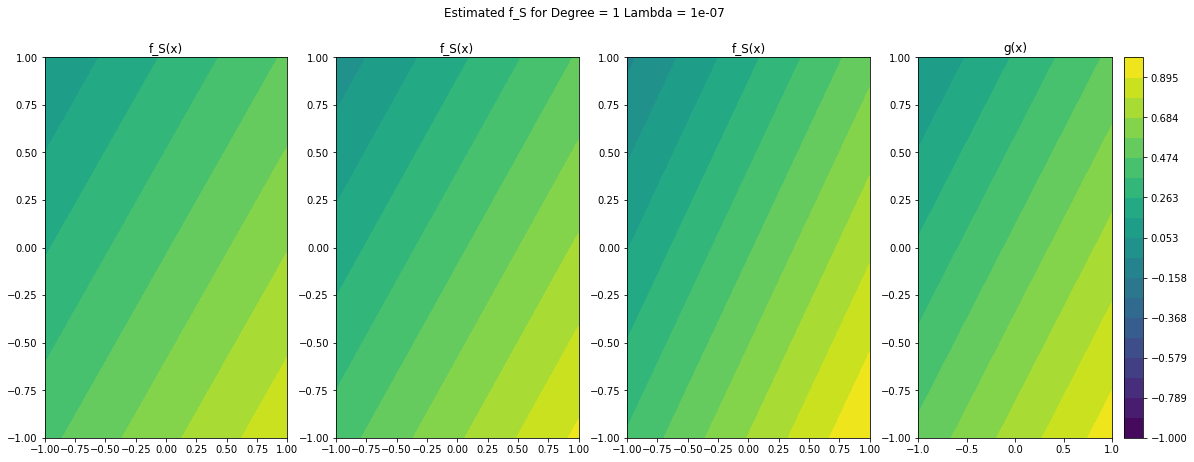

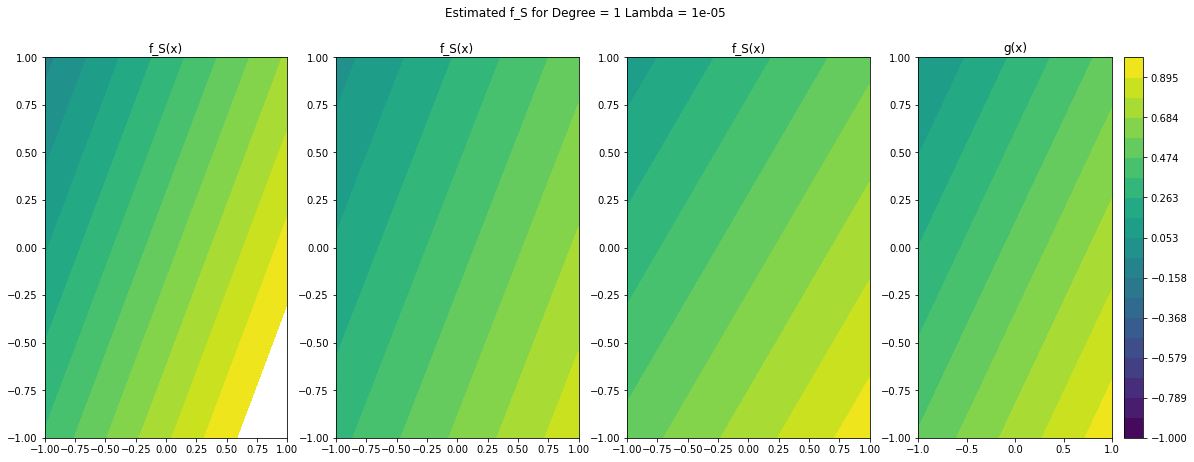

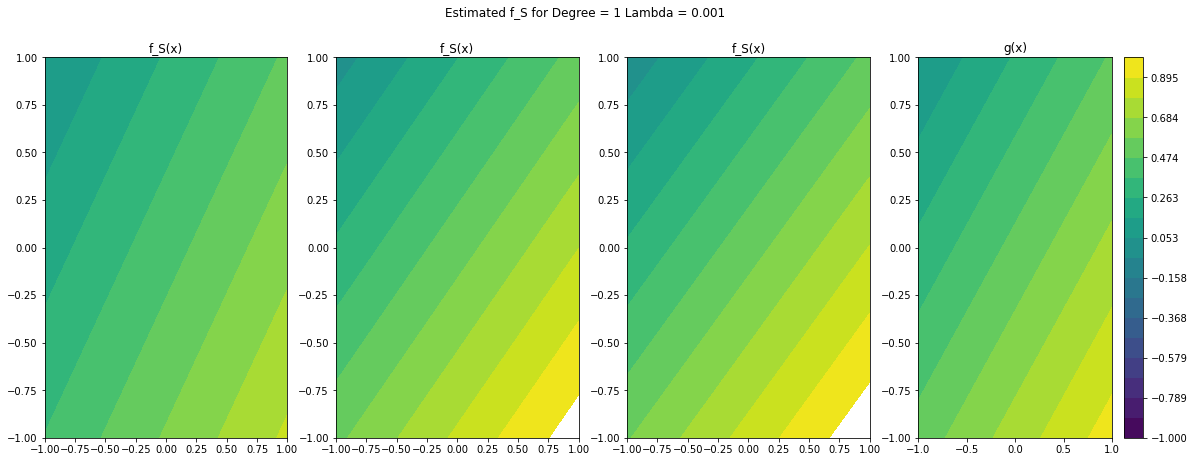

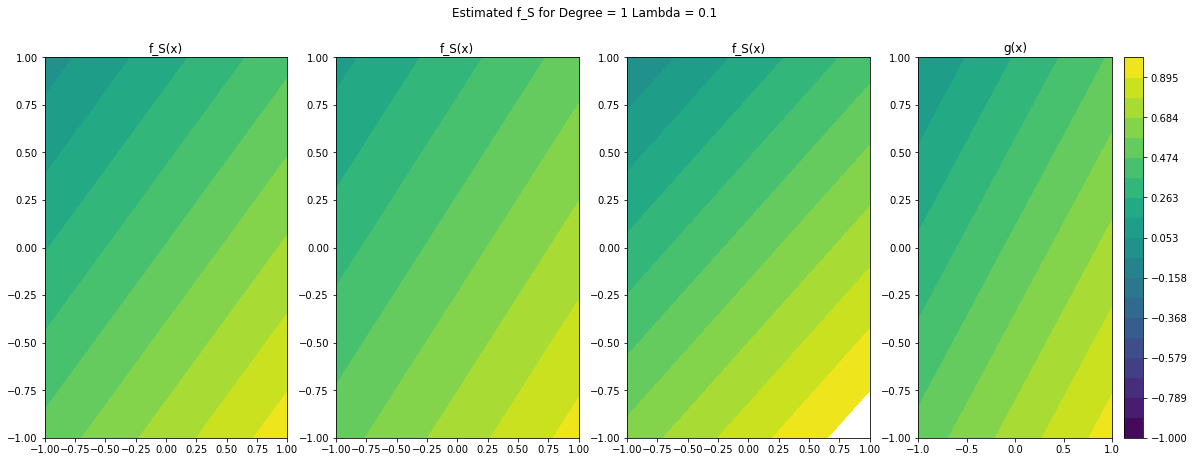

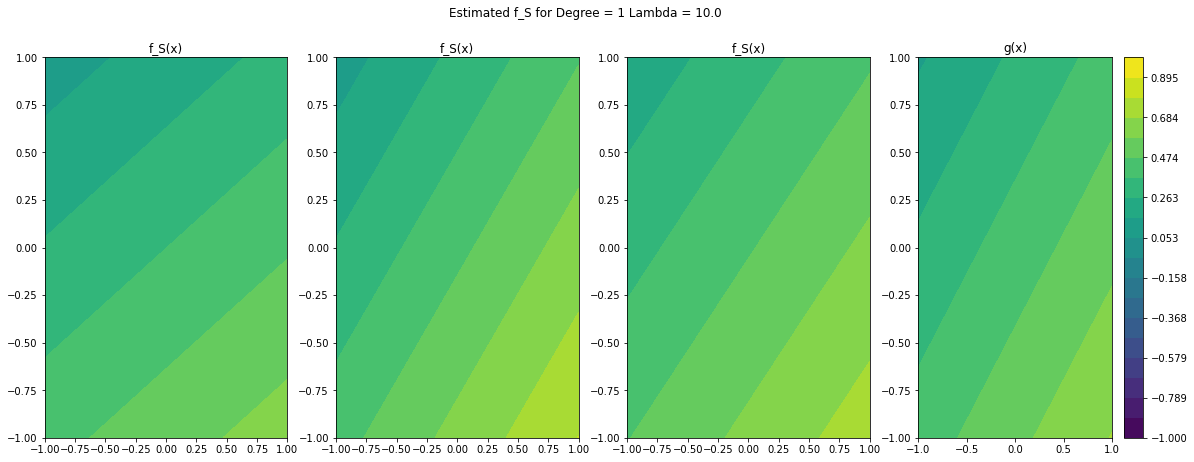

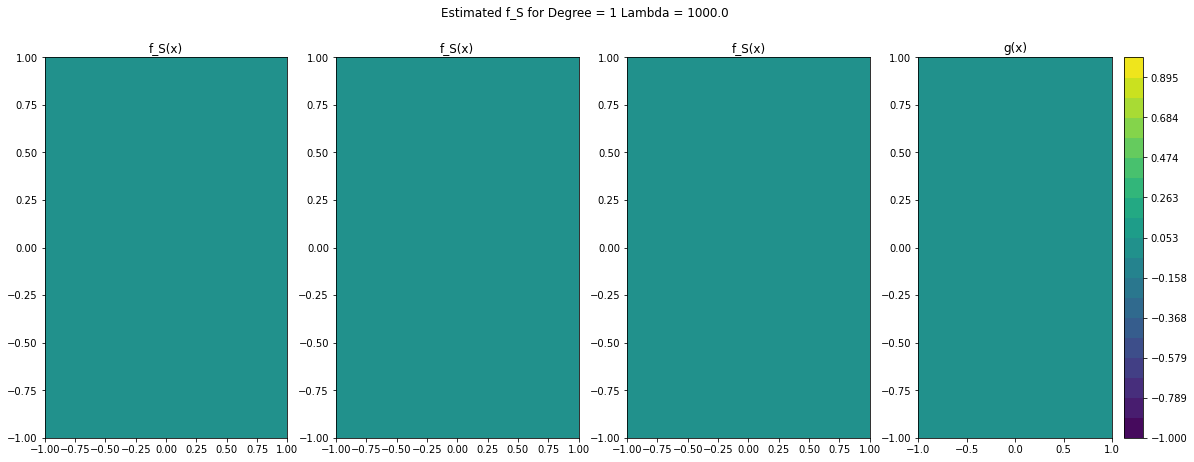

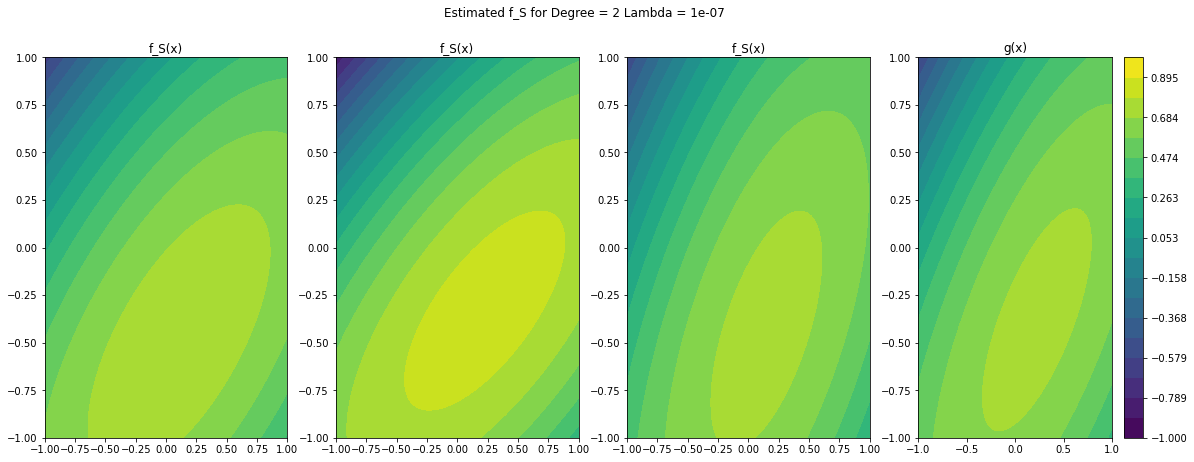

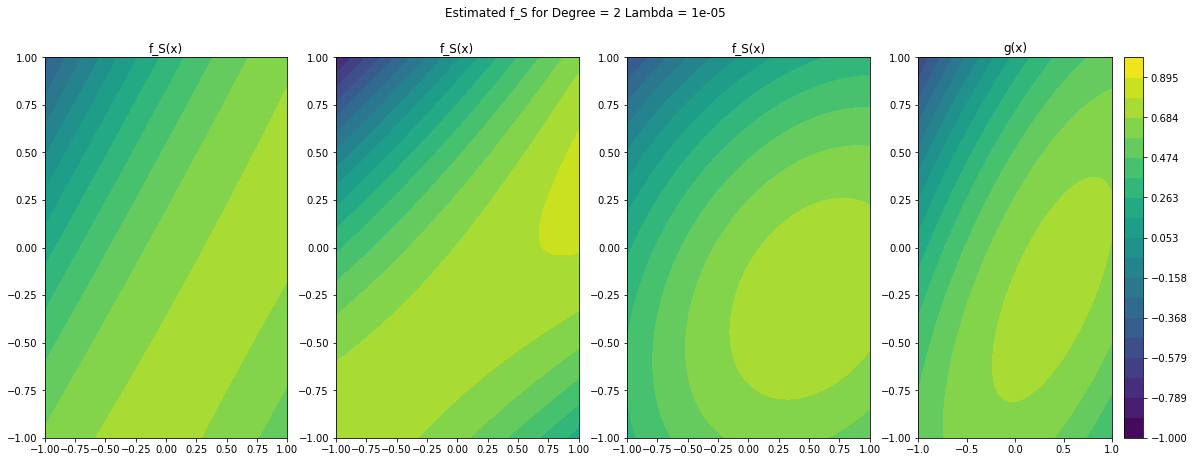

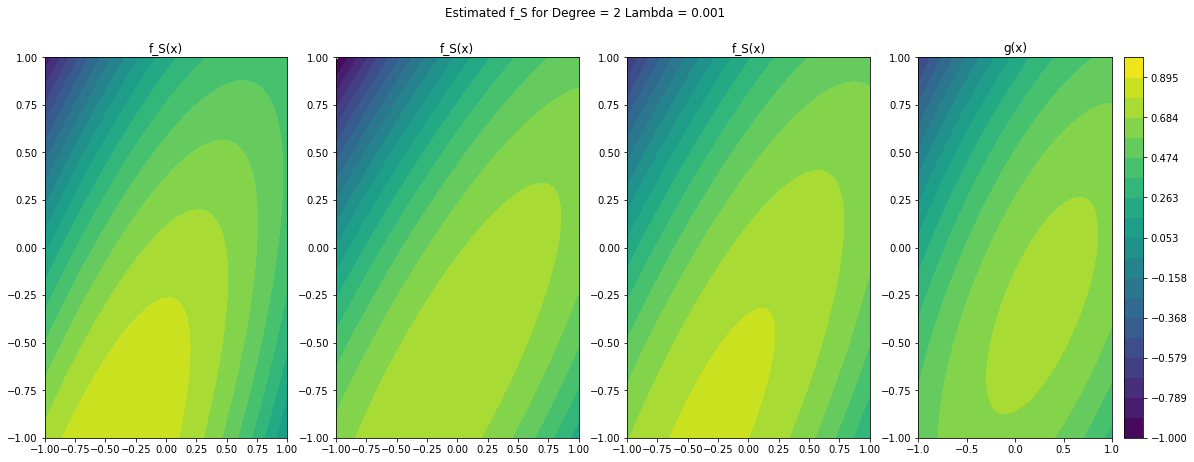

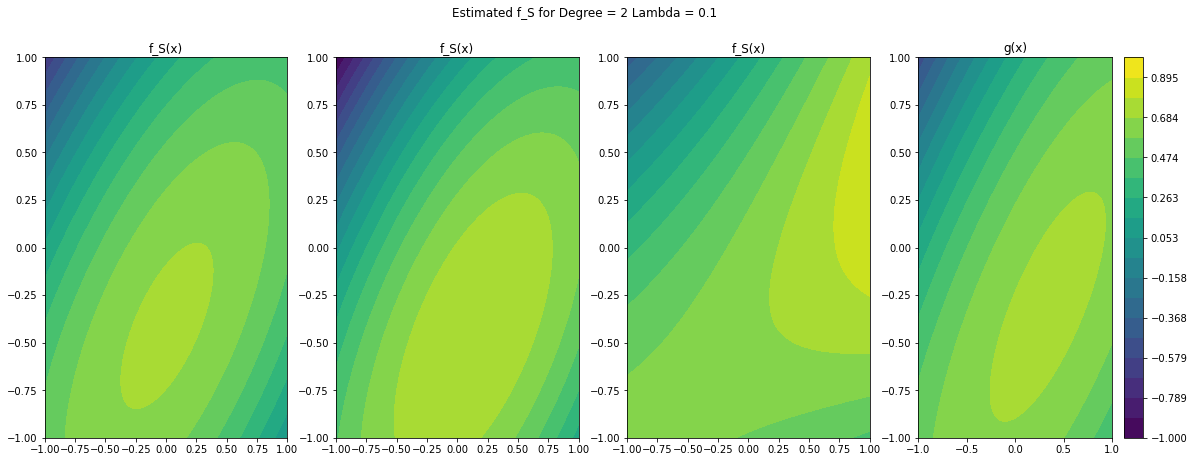

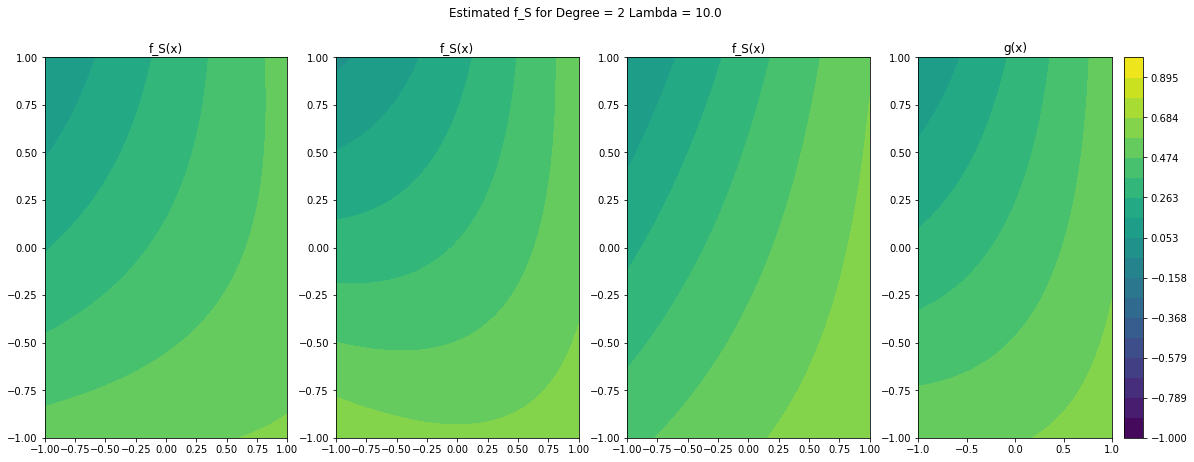

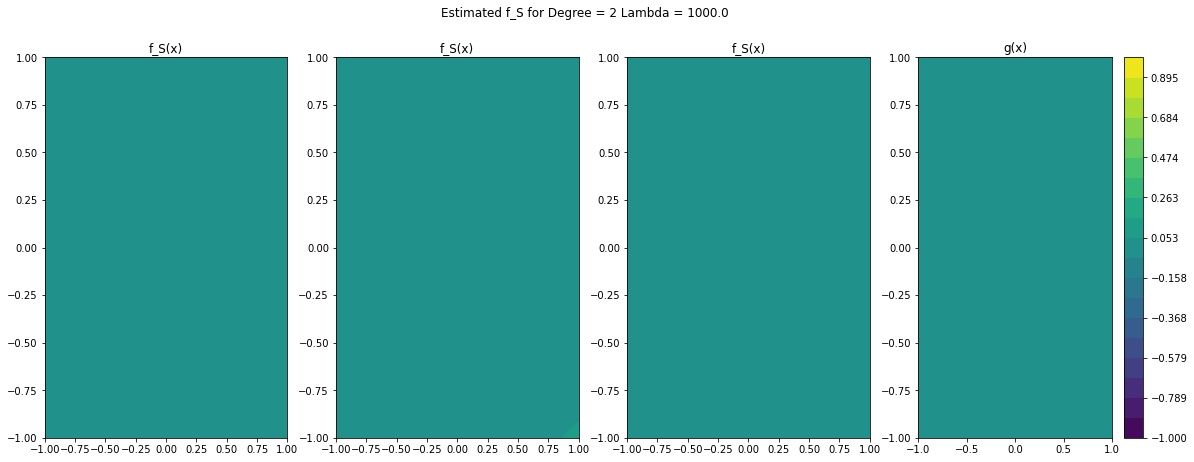

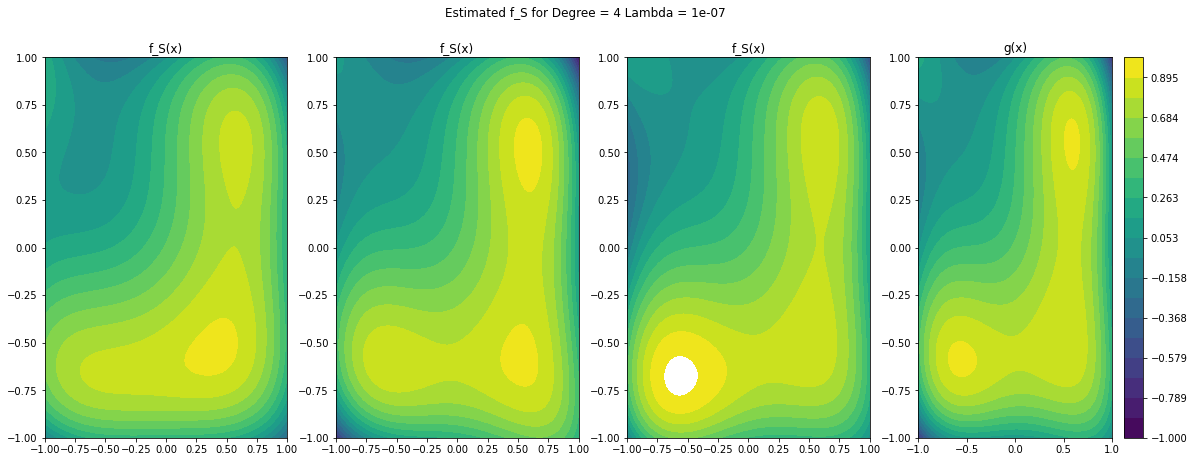

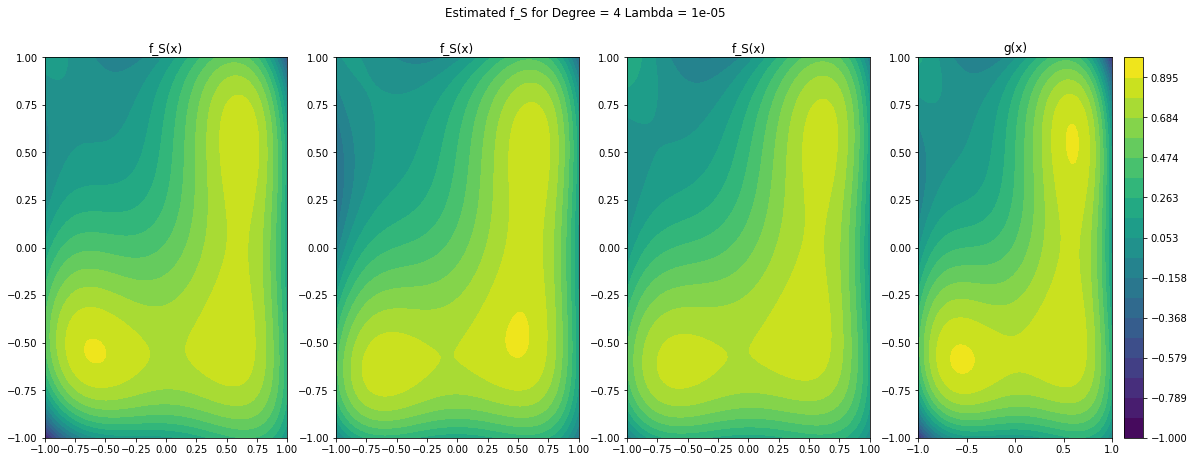

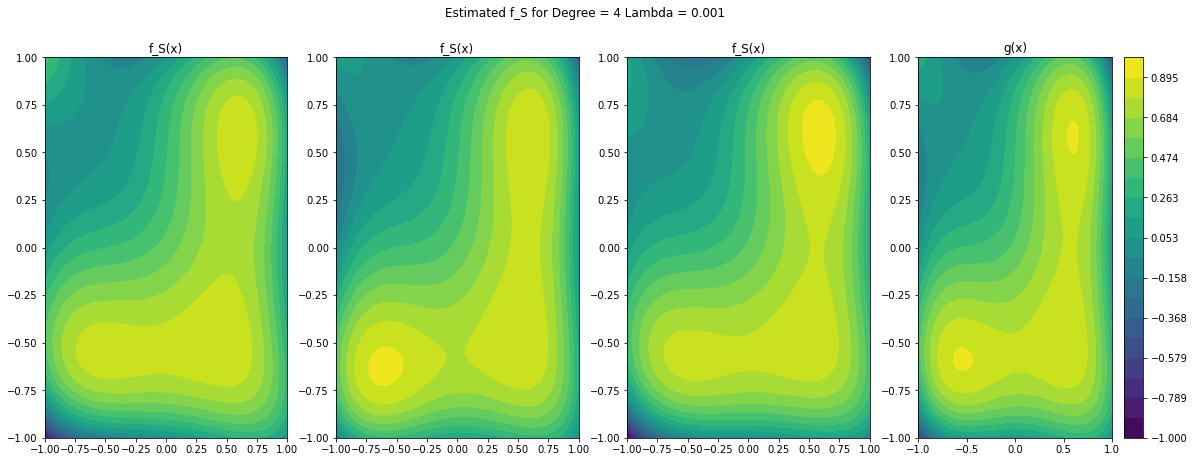

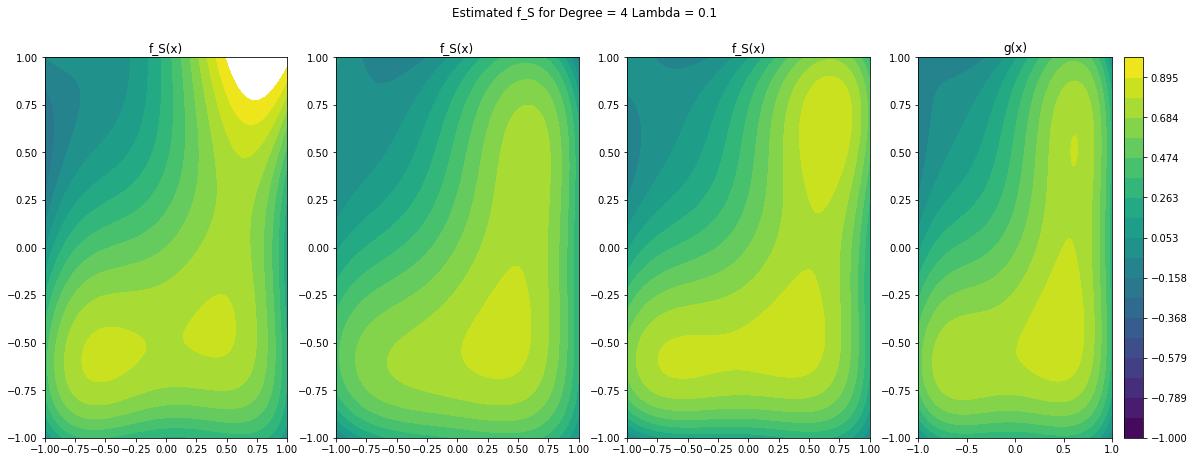

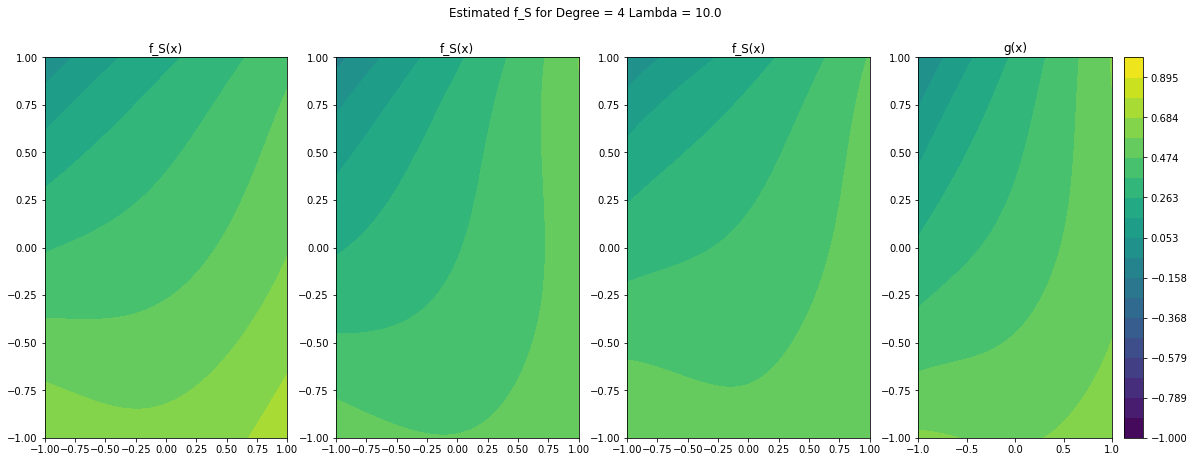

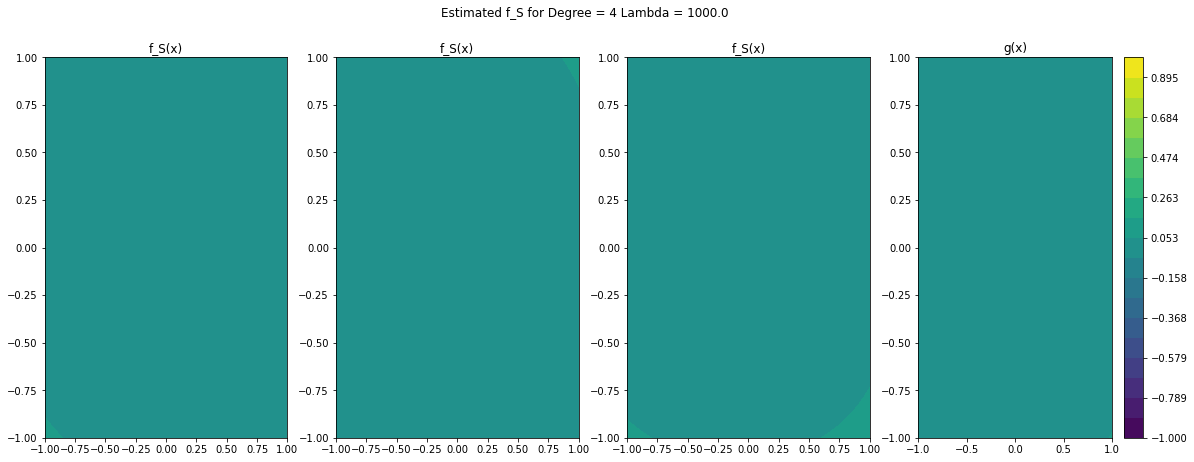

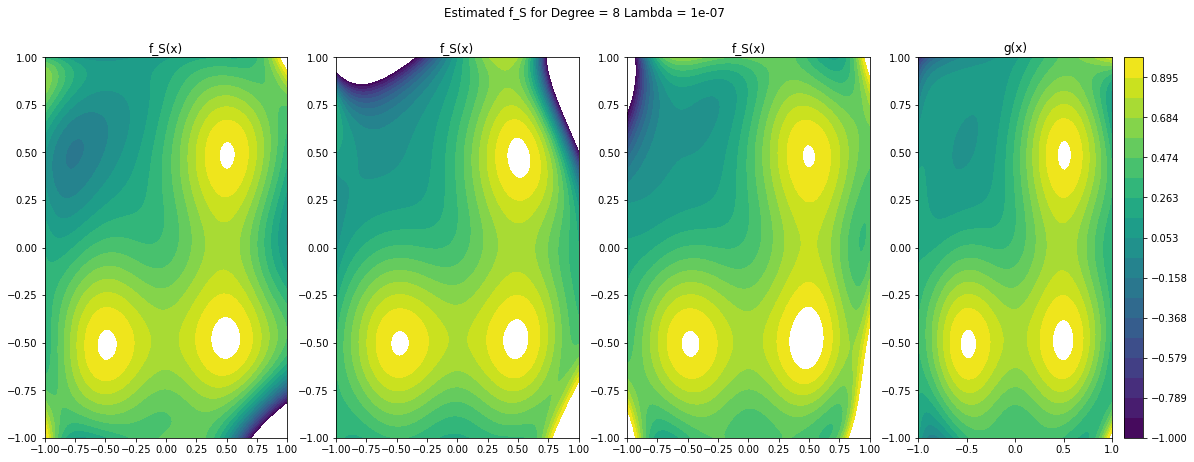

KeyboardInterrupt: 

In [76]:
import random

def polynomial_regression_ridge_pred(X_test, wt_vec, degree=1):

    n=len(X_test)
    d1=len(wt_vec)
    array=[None]*n
    count=0
    for x in range (0,n):
      array[x]=0
      count=1
      for y in range(1,degree+1):
        term=pow(X_test[x][0],y)
        k=0
        for z in range(0,y+1):
          term=pow(X_test[x][0],y-z)*pow(X_test[x][1],z)
          k=k+wt_vec[count]*term
          count=count+1
        array[x]=array[x]+k
      array[x]=array[x]+wt_vec[0]
    return array

    
def visualise_polynomial_2d(wt_vector, degree, title=""):

    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
    rows=10000
    cols=2
    arr = np.zeros((10000,2))
    count1=0
    
    for x in range(0,100):
        for y in range(0,100):
            arr[count1][0]=X[x][y]
            arr[count1][1]=Y[x][y]
            #("k")
            count1=count1+1
    Z=polynomial_regression_ridge_pred(arr, wt_vector, degree)
    Z = np.array(Z)
#    Get Z using other functions
    Z = (Z.reshape(100,-1))
    plt.contourf(X,Y,Z,levels=np.linspace(-1,1,20))
    plt.title(title)
    plt.colorbar()
    plt.show()
    



def polynomial_regression_ridge_train(X_train, Y_train, degree=1, reg_param=0.01):
    rows=len(X_train)
    cols=((degree+2)*(degree+1))
    cols=int(cols/2)
    #("cols",cols)
    arr = np.zeros((rows,cols))
    for x in range (0,rows):
      count=0
      for y in range(0,degree+1):
        for z in range(0,y+1):
          j=y-z
          arr[x][count]=pow(X_train[x][0],y-z)*pow(X_train[x][1],z)
          count=count+1
    #("array",arr)
    arr_transpose=arr.T
    res=np.dot(arr_transpose,arr)
    id=np.identity(cols)
    id=np.multiply(id,reg_param)
    res=res+id
    res=np.linalg.inv(res)
    res=np.dot(res,arr_transpose)
    res=np.dot(res,Y_train)
    #(res)
    #("res",res)
    return res

def compute_BV_error_sample_plot(degree, reg_param, num_training_samples=50):
    n = num_training_samples
    x = np.zeros((n,2))
    y = np.zeros(n)
    a = np.array([0.5,0.5])
    b = np.array([-0.5,-0.5])
    c = np.array([0.5,-0.5])
    cols=((degree+2)*(degree+1))
    cols=int(cols/2)
    big_w=np.zeros((cols,100))
    w1 = np.zeros(n)

    for h in range(100):
        for i in range(n):
            x[i][0] = random.uniform(-1, 1)
            x[i][1] = random.uniform(-1, 1)
            y[i] = np.exp(-4*np.inner(x[i]-a,x[i]-a)) + np.exp(-4*np.inner(x[i]-b,x[i]-b)) +np.exp(-4*np.inner(x[i]-c,x[i]-c))

        #(x)
        #("y",y)
        w = polynomial_regression_ridge_train(x,y,degree,reg_param)
        #("kl",w)
        for g in range(0,cols):
            big_w[g][h]=w[g]
    #(big_w)

    rows=n
    #("prakash")
   # #("cols",cols)
    big_phi = np.zeros((rows,cols))
    for i in range (0,rows):
      count=0
      for j in range(0,degree+1):
        for z in range(0,j+1):
          big_phi[i][count]=pow(x[i][0],z)*pow(x[i][1],j-z)
          count=count+1
    res=np.dot(big_phi,big_w)
    avg=np.zeros(n)
    
    for k in range(0,n):
        for l in range (0,100):
            avg[k]=avg[k]+res[k][l]
        avg[k]=avg[k]/100
        
    variance=0
    #("variance",variance)
    for m in range (0,n):
        for b in range(0,100):
            variance=variance+(res[m][b]-avg[m])*(res[m][b]-avg[m])
        
    variance=variance/(n*100)
        
    # print(variance)
    bias=0
    for i in range(0,n):
        bias=bias+(avg[i]-y[i])*(avg[i]-y[i])
    bias=bias/n
    # print("bias",bias)
    mse=variance+bias
    # print("mse",mse)
    b_tr=big_w.T
    
    b_avg = np.zeros(cols)
    for i in range (0,cols):
        b_avg[i]=np.mean(big_w[i])
    
    fig,a =  plt.subplots(1,4,figsize=(20,7))
    for i in range(0,4):
        
        if(i == 3):
            wt_vector = b_avg
        else:
            wt_vector=b_tr[i]
        
        X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
        rows=10000
        cols=2
        arr = np.zeros((10000,2))
        count1=0

        for x in range(0,100):
            for y in range(0,100):
                arr[count1][0]=X[x][y]
                arr[count1][1]=Y[x][y]
                #("k")
                count1=count1+1
        Z=polynomial_regression_ridge_pred(arr, wt_vector, degree)
        Z = np.array(Z)
    #    Get Z using other functions
        Z = (Z.reshape(100,-1))
        z = a[i].contourf(X,Y,Z,levels=np.linspace(-1,1,20))
        if(i == 3):
            a[i].set_title("g(x)")
        else:
            a[i].set_title("f_S(x)")
    fig.colorbar(z)
    fig.suptitle('Estimated f_S for Degree = '+str(degree)+' Lambda = '+str(reg_param)+'\n')
    plt.show()
        
    return (bias,variance,mse)

# compute_BV_error_sample_plot (2,pow(2.7,-7),3)

def get_bias(degree, reg_param,n):
    b,v,e = compute_BV_error_sample_plot(degree, reg_param,50)
    return b


def get_var(degree, reg_param,n):
    b,v,e = compute_BV_error_sample_plot(degree, reg_param,50)
    return v

for degree in [1,2,4,8,16]:
    for reg_param in [1e-7,1e-5,1e-3,1e-1,1e1,1e3]:
        b,v,e = compute_BV_error_sample_plot(degree, reg_param)
        plt.show()

# for degree in [1,2,4,8,16]:
#     print("| Degree = ",degree," | " , get_var(degree,1e-7,n)," | " , get_var(degree,1e-5,n), " | ", get_var(degree,1e-3,n)," | ", get_var(degree,1e-1,n)," |   "   ,get_var(degree,10,n)," | ", get_var(degree,1000,n), "|")

# for degree in [1,2,4,8,16]:
#     for reg_param in [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]:
#         # plt.figure()
#         b,v,e = compute_BV_error_sample_plot(degree, reg_param)
#         print('================================')
#         print('Degree= '+str(degree)+' lambda= '+str(reg_param))
#         print('Bias = '+str(b))
#         print('Variance = '+str(v))
#         print('MSE = '+str(e))

In [ ]:
# Cell type: convenience



** Cell type: TextWrite **
Give the biases and variances computed for the various algorithms with various degrees and lambdas and summarise your findings.

         						

                                            BIAS MATRIX  
|             | Lambda=10^-7         | Lambda=10^-5         | Lambda=10^-3         | Lambda=0.1           | Lambda=10            | Lambda=1000         |
|-------------|----------------------|----------------------|----------------------|----------------------|----------------------|---------------------|
| Degree =  1  |  0.17039172165851346  |  0.2438863167395984  |  0.1569596033449737  |  0.19210493759347705  |    0.17424170495071942  |  0.4049303447554115 |
| Degree =  2  |  0.16485465591955553  |  0.21262031906357176  |  0.17164610710082268  |  0.12438711054194876  |    0.10286814208657029  |  0.23642315373400688 |
| Degree =  4  |  0.19187913582778213  |  0.2149022780254404  |  0.1967104099473273  |  0.17151004439760292  |    0.10462175054652313  |  0.2840695642846916 |
| Degree =  8  |  0.22352199447764018  |  0.2183176026137811  |  0.1483060932638314  |  0.22141836101267084  |    0.13717597044789545  |  0.3078547124497751 |
| Degree =  16  |  0.1431786781514116  |  0.1966658272173914  |  0.17487006080643536  |  0.1922569540605333  |    0.18229247894957445  |  0.2882398802010915 |


			   						   VARIANCE MATRIX										

|             | Lambda=10^-7         | Lambda=10^-5         | Lambda=10^-3         | Lambda=0.1            | Lambda=10             | Lambda=1000            |
|-------------|----------------------|----------------------|----------------------|-----------------------|-----------------------|------------------------|
| Degree =  1  |  0.0035341628732578493  |  0.0033381757135454997  |  0.004019557116136225  |  0.003117461747317984  |    0.0018251723760044148  |  5.835062355646321e-06 |
| Degree =  2  |  0.006184832605252175  |  0.005203977634995364  |  0.006228174515890565  |  0.0060527944433918165  |    0.002059532859073021  |  7.5897655173211414e-06 |
| Degree =  4  |  0.009359954555780285  |  0.008624918613213534  |  0.00509062935314821  |  0.0036337896835372183  |    0.002098895793696649  |  7.884160596091875e-06 |
| Degree =  8  |  0.19704612587668124  |  0.022357983671859056  |  0.012290970141978224  |  0.006851505547629497  |    0.002329531706030124  |  1.3017483130716815e-05 |
| Degree =  16  |  0.3726428968138898  |  0.11607678112486322  |  0.026146168976928726  |  0.02200129107368237  |    0.003981390292264793  |  1.2592578614901302e-05 |

Observations:
->The trend that we assume that when lambda increases variance decreases and bias increases wont happen always
->similarly happens to degree trends to



** Cell type : TextRead **

# Problem 4 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset4_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using four different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the first few samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

The lambda value is given by the regularisation parameter.

For each training set size compute how the train and test squared error varies with degree and regularisation parameter, via a 5x6 table (where $(i,j)^{th}$ entry corrosponds to $(degree, \lambda)$ ) with appropriate row and column headings. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels . 

Summarise your findings in the next text cell in a few sentences. And reproduce the tables showing train and test error for various training sizes. You may reuse functions defined previously.




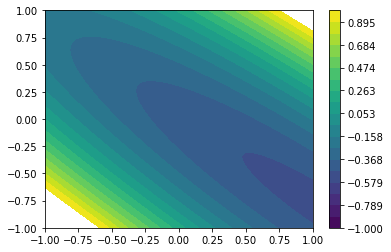

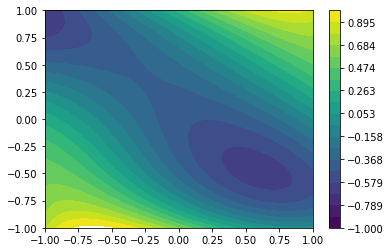

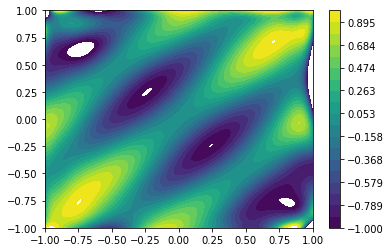

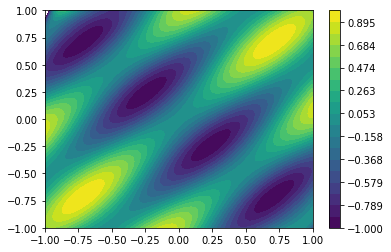

In [54]:
data = np.load('dataset4_1.npz')


X_train = data['arr_0']
Y_train = data['arr_1']
X_test = data['arr_2']
Y_test = data['arr_3']

def chumma(degree, reg_param, num_training_samples):
    n = num_training_samples
    cols=((degree+2)*(degree+1))
    cols=int(cols/2)


    get_x_train = X_train[:n]
    get_y_train = Y_train[:n]

    x=get_x_train
    y=get_y_train

    rows=n
        #(x)
        #("y",y)
    w = polynomial_regression_ridge_train(x,y,degree,reg_param)
        #("kl",w)
    big_phi = np.zeros((rows,cols))
    for i in range (0,rows):
      count=0
      for j in range(0,degree+1):
        for z in range(0,j+1):
          big_phi[i][count]=pow(x[i][0],z)*pow(x[i][1],j-z)
          count=count+1
    res=np.dot(big_phi,w)
    diff=res-y
    error1=0
    for c in range(0,n):
        error1=error1+diff[c]*diff[c]
    error1=error1/n

    get_x_test = X_test[:n]
    get_y_test = Y_test[:n]

    x=get_x_test
    y=get_y_test

    ig_phi = np.zeros((rows,cols))
    for i in range (0,rows):
      count=0
      for j in range(0,degree+1):
        for z in range(0,j+1):
          big_phi[i][count]=pow(x[i][0],z)*pow(x[i][1],j-z)
          count=count+1
    res=np.dot(big_phi,w)
    diff=res-y

    error2 = 0
    for c in range(0,n):
        error2=error2+diff[c]*diff[c]
    error2=error2/n

    return (error1,error2)

def train_error(degree, reg_param, num_training_samples):
    x,y = chumma(degree, reg_param, num_training_samples)
    return x

def test_error(degree, reg_param, num_training_samples):
    x,y = chumma(degree, reg_param, num_training_samples)
    return y


x = X_train[:50]
y = Y_train[:50]
w = polynomial_regression_ridge_train(x,y,2,0.1)
visualise_polynomial_2d(w,2)

x = X_train[:100]
y = Y_train[:100]
w = polynomial_regression_ridge_train(x,y,4,1e-9)
visualise_polynomial_2d(w,4, title="")

x = X_train[:200]
y = Y_train[:200]
w = polynomial_regression_ridge_train(x,y,16,1e-9)
visualise_polynomial_2d(w,16, title="")

x = X_train[:1000]
y = Y_train[:1000]
w = polynomial_regression_ridge_train(x,y,16,1e-9)
visualise_polynomial_2d(w,16, title="")

# for n in [50,100,200,1000]:
#     for degree in [1,2,4,8,16]:
#         print("| Degree = ",degree," | " , train_error(degree,1e-9,n)," | " , train_error(degree,1e-7,n), " | ", train_error(degree,1e-5,n)," | ", train_error(degree,1e-3,n)," |   "   ,train_error(degree,1e-1,n)," | ", train_error(degree,10,n), "|")
    

** Cell type : TextWrite **
       




           TEST SQUARED ERROR MATRIX(TRAINING SAMPLE SIZE = 50)										

|             | Lambda=10^-9       | Lambda=10^-7      | Lambda=10^-5       | Lambda=0.001       | Lambda=0.1         | Lambda=10           |
|-------------|--------------------|-------------------|--------------------|--------------------|--------------------|---------------------|
| Degree =  1  |  0.29562572328680736  |  0.29562572285137656  |  0.295625679308327  |  0.2956213253881329  |    0.2951897507381901  |  0.2730320847723611 |
| Degree =  2  |  0.14869151172445622  |  0.14869150926840025  |  0.14869126366567217  |  0.1486667320374667  |    0.14648335404880308  |  0.19265099429169122 |
| Degree =  4  |  0.15935511464415825  |  0.15935509317936047  |  0.15935294801266012  |  0.15915111207385713  |    0.15942180305337184  |  0.18440831754505269 |
| Degree =  8  |  30.39505776070248  |  15.674138475718749  |  1.2715000079155998  |  0.2989838100733759  |    0.14745215347412943  |  0.1872706775159091 |
| Degree =  16  |  34.3999495373794  |  19.47897082529957  |  13.635943966516686  |  0.26632659571665285  |    0.164600339226437  |  0.1919262648407784 |     

            TRAINING SQUARED ERROR MATRIX(TRAINING SAMPLE SIZE = 50)										

|             | Lambda=10^-9        | Lambda=10^-7        | Lambda=10^-5         | Lambda=0.001         | Lambda=0.1          | Lambda=10           |
|-------------|---------------------|---------------------|----------------------|----------------------|---------------------|---------------------|
| Degree =  1  |  0.35109009823534876  |  0.35109009776882694  |  0.35109005111668223  |  0.351085386275141  |    0.3506226046186526  |  0.3255515630561085 |
| Degree =  2  |  0.15116422374269078  |  0.1511642249196007  |  0.15116434261143108  |  0.15117612018874965  |    0.1524308017462588  |  0.2428940877393428 |
| Degree =  4  |  0.1665541556138057  |  0.1665541546611329  |  0.16655405955437946  |  0.16654608267869989  |    0.16655100191196096  |  0.22161289864490982 |
| Degree =  8  |  840.304036718669  |  650.6371579448089  |  66.76579074973057  |  2.9355762182531904  |    0.1402126076478896  |  0.21424916669404154 |
| Degree =  16  |  780.6835699343058  |  835.5497685632341  |  221.30658482219496  |  7.85157211409145  |    0.17317140065725833  |  0.21588961029549178 |


            TEST SQUARED ERROR MATRIX(TRAINING SAMPLE SIZE = 100)										

|             | Lambda=10^-9       | Lambda=10^-7       | Lambda=10^-5       | Lambda=0.001       | Lambda=0.1         | Lambda=10           |
|-------------|--------------------|--------------------|--------------------|--------------------|--------------------|---------------------|
| Degree =  1  |  0.30182125528471476  |  0.3018212552277397  |  0.30182124953022316  |  0.3018206798055629  |    0.3017639761229619  |  0.2980105147462712 |
| Degree =  2  |  0.14556181001059004  |  0.14556180998496487  |  0.1455618074226379  |  0.1455615530745516  |    0.14555451841250872  |  0.18414811630173944 |
| Degree =  4  |  0.14656225356333114  |  0.14656225628773473  |  0.14656252873222106  |  0.14658981367042181  |    0.14927525435752131  |  0.1771325587897319 |
| Degree =  8  |  0.6838664104234334  |  0.6827175104160758  |  0.5858407550779275  |  0.17924052561448123  |    0.1583182479263333  |  0.18032420742328883 |
| Degree =  16  |  19.015020200189916  |  7.346964427183584  |  12.489217257155468  |  0.39796406864555506  |    0.15649714978000748  |  0.18259488067700386 |

            TRAINING SQUARED ERROR MATRIX(TRAINING SAMPLE SIZE = 100)										

|             | Lambda=10^-9       | Lambda=10^-7        | Lambda=10^-5        | Lambda=0.001         | Lambda=0.1        | Lambda=10           |
|-------------|--------------------|---------------------|---------------------|----------------------|-------------------|---------------------|
| Degree =  1  |  0.2807834275628796  |  0.28078342750292756  |  0.2807834215077281  |  0.2807828220146028  |    0.28072313993348563  |  0.2766756145430015 |
| Degree =  2  |  0.1536799326608054  |  0.15367993249306192  |  0.1536799157188974  |  0.15367824014092452  |    0.1535286517636322  |  0.1810470073378766 |
| Degree =  4  |  0.14984654915824192  |  0.14984655004422992  |  0.14984663865680564  |  0.14985563634247887  |    0.1513794524288064  |  0.17215122867755187 |
| Degree =  8  |  1.1910751277709881  |  1.188959452657082  |  1.0083647230771673  |  0.22975148431188494  |    0.1834505908931776  |  0.17682907787114086 |
| Degree =  16  |  132.84885856364707  |  57.452657896882336  |  144.12718403954966  |  1.6353588844032987  |    0.1874619367781896  |  0.18542144085354764 |


            TEST SQUARED ERROR MATRIX(TRAINING SAMPLE SIZE = 200)										

|             | Lambda=10^-9       | Lambda=10^-7        | Lambda=10^-5        | Lambda=0.001       | Lambda=0.1         | Lambda=10           |
|-------------|--------------------|---------------------|---------------------|--------------------|--------------------|---------------------|
| Degree =  1  |  0.26384413429358633  |  0.2638441342730462  |  0.263844132219057  |  0.2638439268243183  |    0.2638234291608665  |  0.2621249715859824 |
| Degree =  2  |  0.1470711223908977  |  0.14707112223657115  |  0.14707110680397564  |  0.1470695640291337  |    0.14692008409940477  |  0.15362052560174969 |
| Degree =  4  |  0.13997861006374343  |  0.1399786093640677  |  0.1399785393994311  |  0.1399715723684956  |    0.1395208781947339  |  0.15428721291402822 |
| Degree =  8  |  0.14646677452354998  |  0.14646288735123067  |  0.14607731784494585  |  0.12374399287729512  |    0.11684839184449763  |  0.15490022043389604 |
| Degree =  16  |  0.021423612550827385  |  0.039792937452329126  |  0.12254907853980876  |  0.08284193543408383  |    0.11362806911579398  |  0.15016252024802187 |     

            TRAINING SQUARED ERROR MATRIX(TRAINING SAMPLE SIZE = 200)										

|             | Lambda=10^-9       | Lambda=10^-7         | Lambda=10^-5         | Lambda=0.001        | Lambda=0.1          | Lambda=10           |
|-------------|--------------------|----------------------|----------------------|---------------------|---------------------|---------------------|
| Degree =  1  |  0.26021334643201927  |  0.2602133464153887  |  0.26021334475234986  |  0.2602131784519323  |    0.2601965830884221  |  0.2588307462971173 |
| Degree =  2  |  0.13896499812005486  |  0.13896499814575158  |  0.138965000715455  |  0.1389652580079056  |    0.13899417099679032  |  0.1544982905125089 |
| Degree =  4  |  0.11635474433091433  |  0.11635474455796448  |  0.11635476726620757  |  0.11635707015072434  |    0.11684572392669945  |  0.15112901672955634 |
| Degree =  8  |  0.1689787876734783  |  0.16897204488067272  |  0.1683047750295854  |  0.13352645313697298  |    0.10421835683085746  |  0.14935965962273984 |
| Degree =  16  |  0.02062793375974231  |  0.18478744812198714  |  0.47354831533713176  |  0.11383151886295932  |    0.11344454437110124  |  0.14392188123755342 |


            TEST SQUARED ERROR MATRIX(TRAINING SAMPLE SIZE = 1000)										

|             | Lambda=10^-9        | Lambda=10^-7          | Lambda=10^-5       | Lambda=0.001        | Lambda=0.1         | Lambda=10           |
|-------------|---------------------|-----------------------|--------------------|---------------------|--------------------|---------------------|
| Degree =  1  |  0.25589031951651026  |  0.2558903195162498  |  0.25589031949020025  |  0.2558903168852592  |    0.2558900565564409  |  0.2558656178994332 |
| Degree =  2  |  0.14181954806649372  |  0.14181954807041208  |  0.14181954846224468  |  0.14181958765669192  |    0.1418236187193822  |  0.14313486177968818 |
| Degree =  4  |  0.12864777153800294  |  0.12864777162925814  |  0.12864778075483294  |  0.12864869392840436  |    0.1287458660619974  |  0.14041966680570858 |
| Degree =  8  |  0.07797809023803742  |  0.07797806578005798  |  0.07797563962119183  |  0.0778868365501612  |    0.09718690485564509  |  0.13479584357163665 |
| Degree =  16  |  0.00015015842961530645  |  0.0012368200836628315  |  0.00942560543642195  |  0.044297766680067054  |    0.08672519003728651  |  0.12787242262202486 |

            TRAINING SQUARED ERROR MATRIX(TRAINING SAMPLE SIZE = 1000)										

|             | Lambda=10^-9       | Lambda=10^-7       | Lambda=10^-5        | Lambda=0.001        | Lambda=0.1          | Lambda=10           |
|-------------|--------------------|--------------------|---------------------|---------------------|---------------------|---------------------|
| Degree =  1  |  0.2409703684981229  |  0.24097036849804648  |  0.24097036849041825  |  0.24097036772756034  |    0.240970291517881  |  0.24096340124962443 |
| Degree =  2  |  0.13884470396617984  |  0.13884470396633952  |  0.13884470398230486  |  0.1388447055897246  |    0.13884497513181224  |  0.13975888646795287 |
| Degree =  4  |  0.126423005483361  |  0.12642300549907795  |  0.1264230070708652  |  0.12642316503872356  |    0.12644650868924293  |  0.13588364501410638 |
| Degree =  8  |  0.0896589383858033  |  0.0896587874911552  |  0.08964374394972095  |  0.08850343525578104  |    0.10032631008310429  |  0.13098001915116206 |
| Degree =  16  |  0.001163026709494236  |  0.0022595650473206837  |  0.008655288513520593  |  0.047231030914903833  |    0.09360897550749986  |  0.12468993418246273 |
             
    Summary:

    1. Best Hyper-parameters:(Minimizing test squared error)
       For training set size =  50:	Degree =  2, Lambda = 0.1		
       For training set size = 100:	Degree =  4, Lambda = 10^-9
       For training set size = 200:	Degree = 16, Lambda = 10^-9
       For training set size =1000:	Degree = 16, Lambda = 10^-9

    2. As training set size increases, training squared error and test squared error decreases. More points enable more scope of approximating the underlying distribution of given data.


SyntaxError: invalid syntax (<ipython-input-10-600d2e5f89b3>, line 1)